In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels

In [2]:
df_mission4_final = pd.read_csv('C:/Users/qvn/Documents/P7_NGUYEN_Quoc_Vuong/df_mission4_final.csv')

In [3]:

df_mission4_final

country        Nom_Pays  quantile     income  c_i_parent  Gini  \
0           UKR         UKRAINE        57  3203.4320          56  24.7   
1           UKR         UKRAINE        53  3074.5366          87  24.7   
2           UKR         UKRAINE        74  3964.9668          65  24.7   
3           UKR         UKRAINE        13  1829.8948          36  24.7   
4           UKR         UKRAINE        87  4937.0570          12  24.7   
...         ...             ...       ...        ...         ...   ...   
5799995     ZAF  AFRIQUE DU SUD        62  2945.2937          71  63.0   
5799996     ZAF  AFRIQUE DU SUD        42  1544.3411          87  63.0   
5799997     ZAF  AFRIQUE DU SUD        20   749.1676          70  63.0   
5799998     ZAF  AFRIQUE DU SUD        36  1310.9304          27  63.0   
5799999     ZAF  AFRIQUE DU SUD        63  3063.2856          62  63.0   

         IGEincome  
0            0.400  
1            0.400  
2            0.400  
3            0.400  
4            0.400  
...            ...  
5799995      0.677  
5799996      0.677  
5799997      0.677  
5799998      0.677  
5799999      0.677  

[5800000 rows x 7 columns]

In [4]:
df_mission4_final_par_pays = df_mission4_final.groupby(by='country',as_index=False).mean()
df_mission4_final_par_pays

country  quantile        income  c_i_parent  Gini  IGEincome
0       ALB      50.5   2994.829902        50.5  29.0   0.815874
1       ARG      50.5   5847.884654        50.5  41.3   0.660000
2       ARM      50.5   1628.382785        50.5  29.6   0.500000
3       AUT      50.5  16637.600204        50.5  30.5   0.245267
4       AZE      50.5   2357.429023        50.5  26.6   0.500000
..      ...       ...           ...         ...   ...        ...
111     VEN      50.5   3167.147724        50.5  47.5   0.660000
112     VNM      50.5   1377.773966        50.5  35.6   0.480000
113     XKX      50.5   2176.269035        50.5  29.0   0.400000
114     YEM      50.5   1042.635870        50.5  36.7   0.660000
115     ZAF      50.5   5617.904880        50.5  63.0   0.677000

[116 rows x 6 columns]

In [5]:
def generate_rev_moyen(df):
    
    revenu_moyen = pd.DataFrame(columns=['revenu_moyen'])
    
    for i in df.index:
        
        df_revenu_moyen = pd.DataFrame(np.repeat(df.iloc[i,2],50000),columns=['revenu_moyen'])
        revenu_moyen = pd.concat([revenu_moyen,df_revenu_moyen])
        
    return revenu_moyen

In [6]:
df_merge_rev_moyen = generate_rev_moyen(df_mission4_final_par_pays)
df_merge_rev_moyen = df_merge_rev_moyen.reset_index(drop=True)
df_merge_rev_moyen

revenu_moyen
0         2994.829902
1         2994.829902
2         2994.829902
3         2994.829902
4         2994.829902
...               ...
5799995   5617.904880
5799996   5617.904880
5799997   5617.904880
5799998   5617.904880
5799999   5617.904880

[5800000 rows x 1 columns]

In [7]:
df_mission4_final = df_mission4_final.sort_values(by='country',ignore_index=True)
df_mission4_final

country        Nom_Pays  quantile     income  c_i_parent  Gini  \
0           ALB         ALBANIE        96  6231.0996          80  29.0   
1           ALB         ALBANIE        99  9351.7510          90  29.0   
2           ALB         ALBANIE        79  3747.2676          60  29.0   
3           ALB         ALBANIE        37  2115.2470          42  29.0   
4           ALB         ALBANIE        41  2216.3960          94  29.0   
...         ...             ...       ...        ...         ...   ...   
5799995     ZAF  AFRIQUE DU SUD        49  1969.1234          41  63.0   
5799996     ZAF  AFRIQUE DU SUD        43  1597.1064          29  63.0   
5799997     ZAF  AFRIQUE DU SUD        39  1403.3020          60  63.0   
5799998     ZAF  AFRIQUE DU SUD        80  6617.9630          50  63.0   
5799999     ZAF  AFRIQUE DU SUD        63  3063.2856          62  63.0   

         IGEincome  
0         0.815874  
1         0.815874  
2         0.815874  
3         0.815874  
4         0.815874  
...            ...  
5799995   0.677000  
5799996   0.677000  
5799997   0.677000  
5799998   0.677000  
5799999   0.677000  

[5800000 rows x 7 columns]

In [8]:
df_mission4_final = pd.concat([df_mission4_final,df_merge_rev_moyen],axis=1)
df_mission4_final

country        Nom_Pays  quantile     income  c_i_parent  Gini  \
0           ALB         ALBANIE        96  6231.0996          80  29.0   
1           ALB         ALBANIE        99  9351.7510          90  29.0   
2           ALB         ALBANIE        79  3747.2676          60  29.0   
3           ALB         ALBANIE        37  2115.2470          42  29.0   
4           ALB         ALBANIE        41  2216.3960          94  29.0   
...         ...             ...       ...        ...         ...   ...   
5799995     ZAF  AFRIQUE DU SUD        49  1969.1234          41  63.0   
5799996     ZAF  AFRIQUE DU SUD        43  1597.1064          29  63.0   
5799997     ZAF  AFRIQUE DU SUD        39  1403.3020          60  63.0   
5799998     ZAF  AFRIQUE DU SUD        80  6617.9630          50  63.0   
5799999     ZAF  AFRIQUE DU SUD        63  3063.2856          62  63.0   

         IGEincome  revenu_moyen  
0         0.815874   2994.829902  
1         0.815874   2994.829902  
2         0.815874   2994.829902  
3         0.815874   2994.829902  
4         0.815874   2994.829902  
...            ...           ...  
5799995   0.677000   5617.904880  
5799996   0.677000   5617.904880  
5799997   0.677000   5617.904880  
5799998   0.677000   5617.904880  
5799999   0.677000   5617.904880  

[5800000 rows x 8 columns]

In [9]:
X = df_mission4_final["country"] # qualitative
Y = df_mission4_final["income"] # quantitative
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

In [10]:
eta_squared(X,Y)

0.49639014231033407

In [11]:
reg_multi = smf.ols('income~revenu_moyen+Gini', data=df_mission4_final).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 2.858e+06
Date:                Wed, 02 Feb 2022   Prob (F-statistic):               0.00
Time:                        07:49:37   Log-Likelihood:            -5.9310e+07
No. Observations:             5800000   AIC:                         1.186e+08
Df Residuals:                 5799997   BIC:                         1.186e+08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     6.318e-10     14.954   4.22e-11   

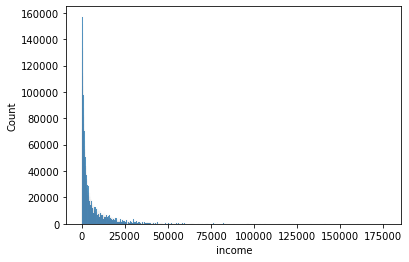

In [12]:
sns.histplot(df_mission4_final.income)
plt.show()

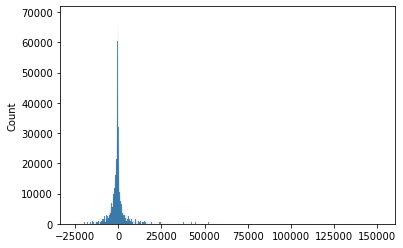

In [13]:
sns.histplot(reg_multi.resid)
plt.show()

In [14]:
import scipy as sc
from scipy import stats

In [15]:
stats.kstest(reg_multi.resid, 'norm')

KstestResult(statistic=0.6561497193696643, pvalue=0.0)

In [16]:
stats.kstest(df_mission4_final.income,'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [17]:
variables = reg_multi.model.exog
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 0.0


## En passant par le logarithme

In [18]:
df_mission4_final_log = df_mission4_final.copy()

In [19]:
df_mission4_final_log.income = np.log(df_mission4_final_log.income)
df_mission4_final_log.revenu_moyen = np.log(df_mission4_final_log.revenu_moyen)

In [20]:
df_mission4_final_log = df_mission4_final_log.rename(columns={'income':'log_income','revenu_moyen':'log_revenu_moyen'})
df_mission4_final_log

country        Nom_Pays  quantile  log_income  c_i_parent  Gini  \
0           ALB         ALBANIE        96    8.737308          80  29.0   
1           ALB         ALBANIE        99    9.143319          90  29.0   
2           ALB         ALBANIE        79    8.228782          60  29.0   
3           ALB         ALBANIE        37    7.656927          42  29.0   
4           ALB         ALBANIE        41    7.703638          94  29.0   
...         ...             ...       ...         ...         ...   ...   
5799995     ZAF  AFRIQUE DU SUD        49    7.585344          41  63.0   
5799996     ZAF  AFRIQUE DU SUD        43    7.375949          29  63.0   
5799997     ZAF  AFRIQUE DU SUD        39    7.246583          60  63.0   
5799998     ZAF  AFRIQUE DU SUD        80    8.797543          50  63.0   
5799999     ZAF  AFRIQUE DU SUD        63    8.027243          62  63.0   

         IGEincome  log_revenu_moyen  
0         0.815874          8.004643  
1         0.815874          8.004643  
2         0.815874          8.004643  
3         0.815874          8.004643  
4         0.815874          8.004643  
...            ...               ...  
5799995   0.677000          8.633714  
5799996   0.677000          8.633714  
5799997   0.677000          8.633714  
5799998   0.677000          8.633714  
5799999   0.677000          8.633714  

[5800000 rows x 8 columns]

In [21]:
X = df_mission4_final_log["country"] # qualitative
Y = df_mission4_final_log["log_income"] # quantitative
eta_squared(X,Y)

0.7292381117732591

In [22]:
reg_multi1 = smf.ols('log_income~log_revenu_moyen+Gini', data=df_mission4_final_log).fit()
print(reg_multi1.summary())

                            OLS Regression Results                            
Dep. Variable:             log_income   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                 7.666e+06
Date:                Wed, 02 Feb 2022   Prob (F-statistic):               0.00
Time:                        07:50:19   Log-Likelihood:            -6.3530e+06
No. Observations:             5800000   AIC:                         1.271e+07
Df Residuals:                 5799997   BIC:                         1.271e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3713      0.003  

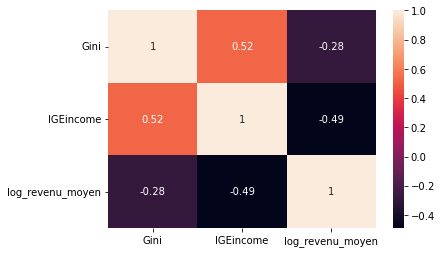

In [23]:
import seaborn as se
se.heatmap(df_mission4_final_log.drop(['log_income','c_i_parent','quantile'],axis=1).corr(method='pearson'),annot=df_mission4_final_log.drop(['log_income','c_i_parent','quantile'],axis=1).corr(method='pearson').values)
plt.show()

In [24]:
stats.kstest(df_mission4_final_log.log_income, 'norm')

KstestResult(statistic=0.9993786587232073, pvalue=0.0)

In [25]:
stats.kstest(reg_multi1.resid,'norm')

KstestResult(statistic=0.10653116934476567, pvalue=0.0)

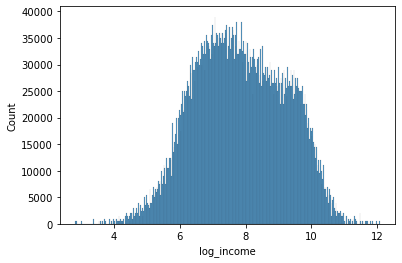

In [26]:
sns.histplot(df_mission4_final_log.log_income)
plt.show()

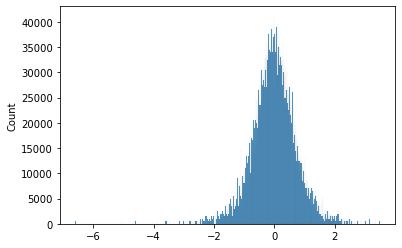

In [27]:
sns.histplot(reg_multi1.resid)
plt.show()

In [28]:
variables = reg_multi1.model.exog
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi1.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 0.0


In [29]:
reg_multi2 = smf.ols('income~revenu_moyen+Gini+c_i_parent', data=df_mission4_final).fit()
print(reg_multi2.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                 2.105e+06
Date:                Wed, 02 Feb 2022   Prob (F-statistic):               0.00
Time:                        07:50:30   Log-Likelihood:            -5.9163e+07
No. Observations:             5800000   AIC:                         1.183e+08
Df Residuals:                 5799996   BIC:                         1.183e+08
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2594.8396     15.329   -169.274   

In [30]:
stats.kstest(reg_multi2.resid,'norm')

KstestResult(statistic=0.579125958078392, pvalue=0.0)

In [31]:
variables = reg_multi2.model.exog
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi2.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 0.0


In [32]:
reg_multi3 = smf.ols('log_income~log_revenu_moyen+Gini+c_i_parent', data=df_mission4_final_log).fit()
print(reg_multi3.summary())

                            OLS Regression Results                            
Dep. Variable:             log_income   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                 6.786e+06
Date:                Wed, 02 Feb 2022   Prob (F-statistic):               0.00
Time:                        07:50:34   Log-Likelihood:            -5.7340e+06
No. Observations:             5800000   AIC:                         1.147e+07
Df Residuals:                 5799996   BIC:                         1.147e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.1837      0.003  

In [33]:
### Prob(Omnibus) < 1 donc log_income n'est pas une variable normale
### Confirmation en visionant le graphique et en faisant test de shapiro
### Skew mesure la symétrie des données, proche de 0 signifie que les résidus sont normalement distribués.
### Ici assez proche de 0 mais si on fait le test de shapiro, on s'aperçoit que les résidus ne sont pas normalement distribués

In [34]:
stats.kstest(df_mission4_final_log.log_income,'norm')
# p-value < 0.05 donc log_income n'est pas normalement distribué

KstestResult(statistic=0.9993786587232073, pvalue=0.0)

In [35]:
stats.kstest(reg_multi3.resid,'norm')

KstestResult(statistic=0.12529452330112106, pvalue=0.0)

In [36]:
variables = reg_multi3.model.exog
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi3.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 0.0


In [37]:
# Kurtosis mesure le point culminant : une grande valeur signifie que les résidus sont regroupés autour de 0 
# ce qui montre que le modèle présente peu de valeurs aberrantes.
# Ici kurtosis = 5.761 donc pas très grands le modèle présente donc des valeurs aberrantes qu'on va supprimer
# pour une meilleure regression
# Durbin-Watson doit être compris entre 1 et 2 pour qu'il y ait homocédasticité (variance des residus faibles)
# Ici proche de 2 donc dans la limite de l'homocédasticité

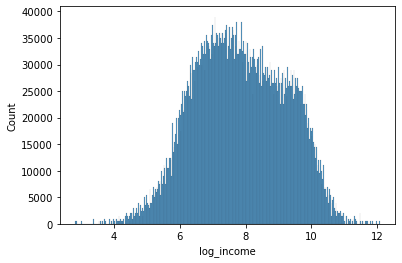

In [38]:
sns.histplot(df_mission4_final_log.log_income)
plt.show()

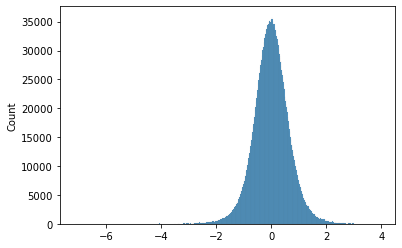

In [39]:
sns.histplot(reg_multi3.resid)
plt.show()

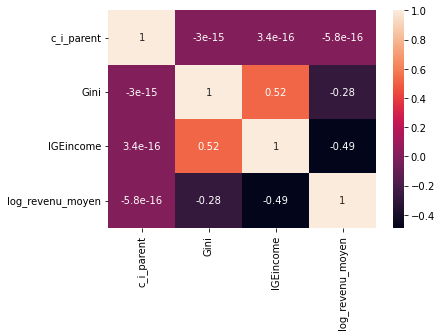

In [40]:
sns.heatmap(df_mission4_final_log.drop(['log_income','quantile'],axis=1).corr(method='pearson'),annot=df_mission4_final_log.drop(['log_income','quantile'],axis=1).corr(method='pearson').values)
plt.show()

In [41]:
x1 = df_mission4_final_log.log_revenu_moyen
x2 = df_mission4_final_log.Gini
x3 = df_mission4_final_log.c_i_parent

beta1 = reg_multi3.params[1]
beta2 = reg_multi3.params[2]
beta3 = reg_multi3.params[3]
intercept = reg_multi3.params[0]

y = intercept+beta1*x1+beta2*x2+beta3*x3

df_mission4_final_log.insert(4,'log_revenu_predict',y)

In [42]:
alpha = 0.05
n = df_mission4_final_log.shape[0]
p = 4
seuil_levier = 2*p/n

In [43]:
analyses = pd.DataFrame({'obs':np.arange(1, n+1)})

analyses['levier'] = reg_multi3.get_influence().hat_matrix_diag
seuil_levier = 2*p/n

In [44]:

seuil_levier

1.3793103448275862e-06

In [45]:
df_seuil = analyses.loc[analyses['levier'] > seuil_levier, :]

influence = reg_multi3.get_influence()

analyses['rstudent'] = influence.resid_studentized_internal
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)

df_seuil_studentisé = analyses.loc[analyses['rstudent'] > seuil_rstudent, :]

In [46]:
# on regroupe les obs atypiques avec les obs aux résidus atypiques
df_obs_atypiques = pd.concat([df_seuil,df_seuil_studentisé])

In [47]:
analyses['dcooks'] = influence.cooks_distance[0]
seuil_dcook = 4/(n-p)

df_seuil_cook = analyses.loc[analyses['dcooks'] > seuil_dcook, :]
# On suprime obs influentes ET atypiques
index_drop = pd.merge(df_seuil_cook,df_obs_atypiques,on='obs',how='inner').index
index_drop

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            173836, 173837, 173838, 173839, 173840, 173841, 173842, 173843,
            173844, 173845],
           dtype='int64', length=173846)

In [48]:
analyses

obs        levier  rstudent        dcooks
0              1  5.789843e-07  0.837095  1.014278e-07
1              2  7.217572e-07  1.292461  3.014160e-07
2              3  4.175889e-07  0.393060  1.612899e-08
3              4  4.138644e-07 -0.182153  3.432984e-09
4              5  7.904537e-07 -0.988978  1.932814e-07
...          ...           ...       ...           ...
5799995  5799996  2.145197e-06 -0.459167  1.130706e-07
5799996  5799997  2.222170e-06 -0.578395  1.858523e-07
5799997  5799998  2.145197e-06 -1.301139  9.079360e-07
5799998  5799999  2.126574e-06  1.252802  8.344233e-07
5799999  5800000  2.153887e-06 -0.134483  9.738619e-09

[5800000 rows x 4 columns]

In [49]:
analyses.insert(4,'income_sans_correction',df_mission4_final.income)

In [50]:
analyses

obs        levier  rstudent        dcooks  income_sans_correction
0              1  5.789843e-07  0.837095  1.014278e-07               6231.0996
1              2  7.217572e-07  1.292461  3.014160e-07               9351.7510
2              3  4.175889e-07  0.393060  1.612899e-08               3747.2676
3              4  4.138644e-07 -0.182153  3.432984e-09               2115.2470
4              5  7.904537e-07 -0.988978  1.932814e-07               2216.3960
...          ...           ...       ...           ...                     ...
5799995  5799996  2.145197e-06 -0.459167  1.130706e-07               1969.1234
5799996  5799997  2.222170e-06 -0.578395  1.858523e-07               1597.1064
5799997  5799998  2.145197e-06 -1.301139  9.079360e-07               1403.3020
5799998  5799999  2.126574e-06  1.252802  8.344233e-07               6617.9630
5799999  5800000  2.153887e-06 -0.134483  9.738619e-09               3063.2856

[5800000 rows x 5 columns]

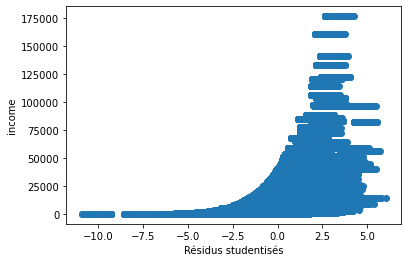

In [51]:
plt.scatter(analyses.rstudent,analyses.income_sans_correction)
plt.xlabel("Résidus studentisés")
plt.ylabel("income")
plt.show()

In [52]:
df_mission4_final_log_corr = df_mission4_final_log.drop(index_drop,axis = 0)

In [ ]:
reg_multi4 = smf.ols('log_income~log_revenu_moyen+Gini+c_i_parent', data=df_mission4_final_log_corr).fit()
print(reg_multi4.summary())

In [ ]:
x1 = df_mission4_final_log_corr.log_revenu_moyen
x2 = df_mission4_final_log_corr.Gini
x3 = df_mission4_final_log_corr.c_i_parent

beta1 = reg_multi4.params[1]
beta2 = reg_multi4.params[2]
beta3 = reg_multi4.params[3]
intercept = reg_multi4.params[0]

y = intercept+beta1*x1+beta2*x2+beta3*x3

In [ ]:
analyses.insert(4,'log_income_predict',y)

In [ ]:
plt.scatter(analyses.rstudent,analyses.log_income_predict)
plt.xlabel("Résidus studentisés")
plt.ylabel("log_income_predict")
plt.show()

In [ ]:
stats.kstest(df_mission4_final_log_corr.log_income,'norm')

In [ ]:
stats.kstest(reg_multi4.resid,'norm')

In [ ]:
# Le facteur d'influence de la variance
variables = reg_multi4.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

In [ ]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi4.resid, variables)
print('p value test Breusch Pagan:', pval)

In [ ]:
sns.heatmap(df_mission4_final_log_corr.drop(['log_income','quantile','log_revenu_predict'],axis=1).corr(method='pearson'),annot=df_mission4_final_log_corr.drop(['log_income','quantile','log_revenu_predict'],axis=1).corr(method='pearson').values)
plt.show()

In [ ]:
sns.histplot(df_mission4_final_log_corr.log_income)
plt.show()

In [ ]:
sns.histplot(df_mission4_final_log_corr.log_revenu_predict)
plt.show()

In [ ]:
sns.histplot(reg_multi4.resid)
plt.show()